# Imports

In [1]:
# system
import os
import pickle
import gzip
# data
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
# model
from sklearn.ensemble import RandomForestClassifier
# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Load Data

In [2]:
trainset = fetch_20newsgroups_vectorized(subset='train')
testset = fetch_20newsgroups_vectorized(subset='test')

In [3]:
X_trainval, y_trainval = trainset['data'], trainset['target']
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)
X_test, y_test = testset['data'], testset['target']

In [4]:
print([item.shape for item in (X_train, X_val, X_test, y_train, y_val, y_test)])

[(8485, 130107), (2829, 130107), (7532, 130107), (8485,), (2829,), (7532,)]


# Preview

In [5]:
print(trainset['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [6]:
X_train[0].shape

(1, 130107)

In [7]:
X_train[0].toarray()

array([[0.        , 0.04159452, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [8]:
y_train.shape

(8485,)

<AxesSubplot:>

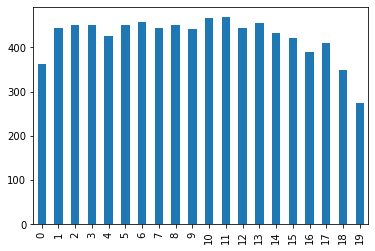

In [9]:
pd.Series(y_train).value_counts().sort_index().plot(kind='bar')

# Model

In [10]:
model = RandomForestClassifier(n_estimators=200, 
                               min_samples_split=5, n_jobs=-1, verbose=1)

In [11]:
%%time
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.2s


Wall time: 24.4 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   24.1s finished


RandomForestClassifier(min_samples_split=5, n_estimators=200, n_jobs=-1,
                       verbose=1)

In [12]:
y_val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished


In [13]:
print(f'Validation Accuracy: {val_acc:.2%}')

Validation Accuracy: 84.02%


# Evaluation 

In [14]:
test_acc = accuracy_score(y_test, model.predict(X_test))
print(f'Test Accuracy: {test_acc:.2%}')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


Test Accuracy: 76.81%


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.6s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.6s finished


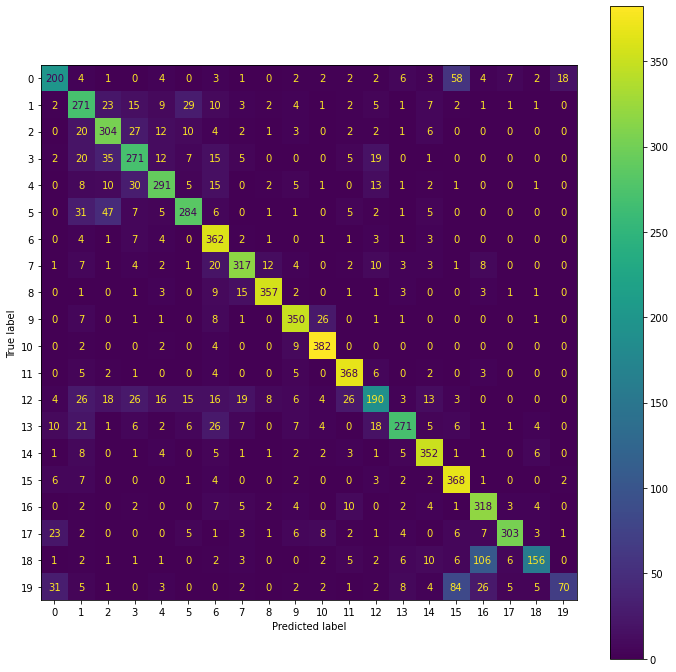

In [15]:
plot_confusion_matrix(model, X_test, y_test, ax=plt.figure(figsize=(12,12)).gca())

# Application

In [16]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(X_test.shape[0])
    print('Collected new features as follows:')
    print(X_test[idx].toarray())
    names = testset['target_names']
    forecasted = model.predict(X_test[idx:idx+1])[0]
    actual = y_test[idx]
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted} ({names[forecasted]})')
    print(f'\nActual data should be {actual} ({names[actual]})')

In [17]:
application()

Collected new features as follows:
[[0. 0. 0. ... 0. 0. 0.]]

CORRECT

Model forecasted as 3 (comp.sys.ibm.pc.hardware)

Actual data should be 3 (comp.sys.ibm.pc.hardware)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
